In [10]:
# import required packages
from imodels import get_clean_dataset
from evaluate_subgroups import split_data
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

In [25]:
X, y, feature_names = get_clean_dataset("diabetes", data_source = "imodels")
X_train, X_valid, X_test, y_train, y_valid, y_test = split_data(X, y, seed = 0)
num_observations = X_test.shape[0]

In [7]:
# initialize empty dataframe
results = pd.read_csv("results/new_imodels_diabetes_1.csv")
for seed in range(2, 6):
    # read in results/imodels_compas_two_year_clean_{seed}.csv
    # add data to results dataframe
    results = pd.concat([results, pd.read_csv(f"results/new_imodels_diabetes_{seed}.csv")], ignore_index=True)
print(results)
# for col in range(4):
#     # make the column a float
#     for row in range(compas_results.shape[0]):
#         compas_results.iloc[row, col] = float(compas_results.iloc[row, col])/float(num_observations)
# # take mean of columns 1-4
# names = compas_results.columns[0:4]
# compas_results = compas_results.iloc[:, 0:4].mean(axis = 1)
# compas_results = pd.DataFrame(np.array(compas_results).reshape(1,4), columns = names)
# print(1-compas_results)

   global_error_rf  global_error_rf_plus  total_local_error_rf  \
0               61                    60                    62   
1               56                    54                    65   
2               52                    55                    63   
3               58                    55                    63   
4               43                    43                    58   

   total_local_error_rf_plus  total_local_int_error_rf_plus  auroc_rf  \
0                         65                             65  0.817121   
1                         56                             56  0.804673   
2                         49                             49  0.831917   
3                         53                             53  0.808484   
4                         49                             49  0.839909   

   auprc_rf     f1_rf  auroc_rf_plus  auprc_rf_plus  ...  \
0  0.698455  0.616352       0.813472       0.712390  ...   
1  0.648322  0.621622       0.828286       0

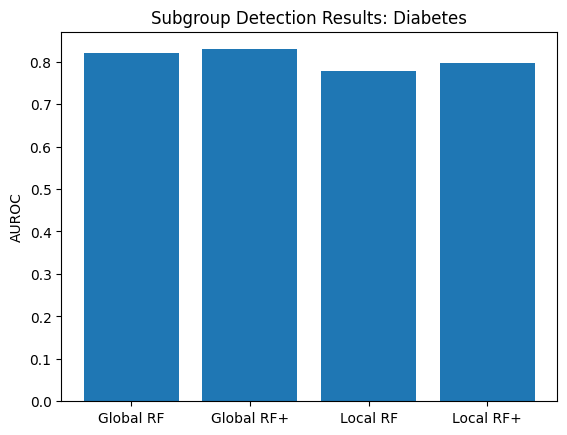

In [19]:
# get dataframe with cols auroc_rf, auroc_rf_plus, rf_weighted_auroc, rf_plus_weighted_auroc
subset = results[['auroc_rf', 'auroc_rf_plus', 'rf_weighted_auroc', 'rf_plus_weighted_auroc']]
# calculate mean of each column
subset = subset.mean(axis = 0)
# make barplot of these values

labels = ['Global RF', 'Global RF+', 'Local RF', 'Local RF+']


# Create the bar plot
plt.bar(labels, subset)

# Add titles and labels
plt.title('Subgroup Detection Results: Diabetes')
plt.xlabel('')
plt.ylabel('AUROC')

# Show the plot
plt.show()

In [15]:
X, y, feature_names = get_clean_dataset("compas_two_year_clean", data_source = "imodels")
X_train, X_valid, X_test, y_train, y_valid, y_test = split_data(X, y, seed = 0)
num_observations = X_test.shape[0]

In [17]:
# initialize empty dataframe
compas_results = pd.read_csv("results/new_imodels_compas_two_year_clean_1.csv")
for seed in range(2, 5):
    # read in results/imodels_compas_two_year_clean_{seed}.csv
    # add data to results dataframe
    compas_results = pd.concat([compas_results, pd.read_csv(f"results/new_imodels_compas_two_year_clean_{seed}.csv")], ignore_index=True)
# for col in range(4):
#     # make the column a float
#     for row in range(_results.shape[0]):
#         enhancer_results.iloc[row, col] = float(enhancer_results.iloc[row, col])/float(num_observations)
compas_results

,global_error_rf,global_error_rf_plus,total_local_error_rf,total_local_error_rf_plus,total_local_int_error_rf_plus,auroc_rf,auprc_rf,f1_rf,auroc_rf_plus,auprc_rf_plus,...,rf_plus_weighted_auroc,rf_plus_weighted_auprc,rf_plus_weighted_f1,rf_weighted_auroc,rf_weighted_auprc,rf_weighted_f1,seed,datasource,dataname,task
0,653,623,676,630,630,0.693304,0.646050,0.643364,0.721805,0.691117,...,0.654139,0.631390,0.580710,0.644037,0.617786,0.600753,1,imodels,compas_two_year_clean,classification
1,654,621,658,615,615,0.691352,0.666254,0.623272,0.715699,0.697154,...,0.685242,0.656518,0.588771,0.667977,0.625887,0.623256,2,imodels,compas_two_year_clean,classification
2,697,650,703,651,651,0.671310,0.650445,0.613850,0.708721,0.701431,...,0.668665,0.657877,0.594256,0.651856,0.616321,0.613738,3,imodels,compas_two_year_clean,classification
3,626,597,651,603,603,0.699989,0.667006,0.650670,0.726533,0.718634,...,0.688633,0.663811,0.623110,0.678494,0.626441,0.638178,4,imodels,compas_two_year_clean,classification


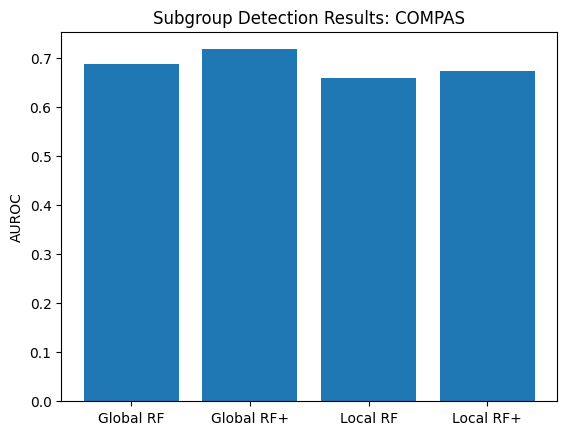

In [20]:
# get dataframe with cols auroc_rf, auroc_rf_plus, rf_weighted_auroc, rf_plus_weighted_auroc
subset = compas_results[['auroc_rf', 'auroc_rf_plus', 'rf_weighted_auroc', 'rf_plus_weighted_auroc']]
# calculate mean of each column
subset = subset.mean(axis = 0)
# make barplot of these values

labels = ['Global RF', 'Global RF+', 'Local RF', 'Local RF+']


# Create the bar plot
plt.bar(labels, subset)

# Add titles and labels
plt.title('Subgroup Detection Results: COMPAS')
plt.xlabel('')
plt.ylabel('AUROC')

# Show the plot
plt.show()

In [21]:
X, y, feature_names = get_clean_dataset(183, data_source = "openml")
X_train, X_valid, X_test, y_train, y_valid, y_test = split_data(X, y, seed = 0)
num_observations = X_test.shape[0]

In [22]:
# initialize empty dataframe
abalone_results = pd.read_csv("results/new_openml_183_1.csv")
for seed in range(2, 6):
    # add data to results dataframe
    abalone_results = pd.concat([abalone_results, pd.read_csv(f"results/new_openml_183_{seed}.csv")], ignore_index=True)
# for col in range(4):
#     # make the column a float
#     for row in range(fico_results.shape[0]):
        # fico_results.iloc[row, col] = float(fico_results.iloc[row, col])/float(num_observations)
abalone_results

,global_error_rf,global_error_rf_plus,total_local_error_rf,total_local_error_rf_plus,total_local_int_error_rf_plus,seed,datasource,dataname,task
0,6071.7049,5869.843657,6708.4364,5734.277412,5734.277412,1,openml,183,regression
1,6360.6866,6129.673357,6964.5513,6193.825686,6193.825686,2,openml,183,regression
2,5910.6841,5675.912805,6625.2252,5681.645709,5681.645709,3,openml,183,regression
3,5719.2192,5430.149224,6393.7450,5510.247853,5510.247853,4,openml,183,regression
4,6422.6376,6222.092069,6953.1133,6336.018877,6336.018877,5,openml,183,regression


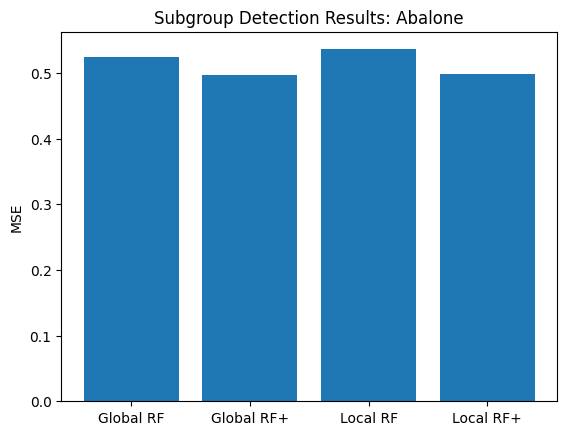

In [24]:
# get dataframe with cols auroc_rf, auroc_rf_plus, rf_weighted_auroc, rf_plus_weighted_auroc
subset = compas_results[['global_error_rf', 'global_error_rf_plus', 'total_local_error_rf', 'total_local_error_rf_plus']]
# calculate mean of each column
subset = subset.mean(axis = 0)/num_observations
# make barplot of these values

labels = ['Global RF', 'Global RF+', 'Local RF', 'Local RF+']


# Create the bar plot
plt.bar(labels, subset)

# Add titles and labels
plt.title('Subgroup Detection Results: Abalone')
plt.xlabel('')
plt.ylabel('MSE')

# Show the plot
plt.show()

In [17]:
X, y, feature_names = get_clean_dataset(8, data_source = "openml")
X_train, X_valid, X_test, y_train, y_valid, y_test = split_data(X, y, seed = 0)
num_observations = X_test.shape[0]

In [18]:
openml_results = pd.read_csv("results/openml_8_1.csv")
for seed in range(2, 6):
    # add data to results dataframe
    openml_results = pd.concat([openml_results, pd.read_csv(f"results/openml_8_{seed}.csv")], ignore_index=True)
for col in range(4):
    # make the column a float
    for row in range(openml_results.shape[0]):
        openml_results.iloc[row, col] = float(openml_results.iloc[row, col])/float(num_observations)
openml_results

,global_error_rf,global_error_rf_plus,total_local_error_rf,total_local_error_rf_plus,seed,datasource,dataname,task
0,12.549004,12.158141,14.291584,15.384509,1,openml,8,regression
1,10.162031,10.143755,12.740303,16.358263,2,openml,8,regression
2,11.035154,11.573886,14.117602,16.029488,3,openml,8,regression
3,10.258891,10.793834,12.711956,20.621230,4,openml,8,regression
4,11.064319,11.238085,13.636273,13.986703,5,openml,8,regression
